In [43]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Pseudo Code
# Create vector of normally distributed x values centered around 0
# Get fitness by evaluating function f(x) = 10*x**2 at given x
# Cross over parents by taking weighted average
# Mutate by generating a random value called mutation factor, for ex: 0.9
# Decide with probability p whether to mutate i'th individual by multiplying by i'th mutation factor
# Select most fit solutions to reproduce

# Function to Parse Knapsack Data
"""
def open_knapsack(knapsack):
    capacity = knapsack['capacity']
    quantity = knapsack['n_items']
    values = knapsack['item_values']
    weights = knapsack['item_weights']

    return (capacity, quantity, values, weights)
"""


# Create Initial Knapsack Population
def objective_function(x):
    f = 10*x**2
    return f


def create_pop(pop_size, pop_spread):
    # Generates initial population of x values
    pop_set = np.zeros((pop_size, 1), dtype=float)
    # makes an empty column vector that has number of rows = pop_size
    for individual in range(pop_size):
        # indexes each row/individual in pop_set
        pop_set[individual, 0] = rand.uniform(-1*pop_spread, pop_spread)
        # chooses each individual's x value from between -spread and +spread
        
    return pop_set


def fitness_calc(pop_set):
    fitness = np.ndarray(shape=(len(pop_set[:, 0]),), dtype=float)

    for individual in range(len(pop_set[:, 0])):
        fitness[individual] = -1*objective_function(pop_set[individual, 0])

    return fitness

def mating(pop_set, fitness, mates_quant):
    mate_order = np.argsort(fitness)[::-1]
    # pop_size x 1 column vector of individual indices (row # in pop_set) in order of descending fitness
    # [::-1] means descending order
    parents = pop_set[mate_order]
    # creates descending fitness-ordered array of parents from whole rows of pop_set
    parents = parents[:mates_quant]
    print("trim parents", parents)
    # trims the number of rows up to but excluding the "mates_quant"'th indexed row
    parent_fitness = fitness[mate_order]
    # grabs the fitness of parents in descending order
    parent_fitness = parent_fitness[:mates_quant]
    # up to the number of parents selected
    # parents and their fitness are related index-wise

    return parents, parent_fitness


def crossover(parents, children_quant):
    children = np.zeros((children_quant, 1), dtype=float)
    # creates column vector with # rows = children_quant
    
    for child in range(children_quant):
        # indexes children up to given # of children
        crossing_ratio = np.random.uniform(0.0, 1.0)
        # generates random value between 0 and 1 to use as a weight for weighted average crossover
        p1_idx = child % children_quant
        # creates index/chooses row of parent for parent 1 of current loop child
        p2_idx = (child + 1) % children_quant
        # does the same for parent 2, restarts at parents[row index 0] when last child made
        children[child] = np.average((parents[p1_idx, 0], parents[p2_idx, 0]), weights=(1 - crossing_ratio, crossing_ratio))
        # performs crossover as weighted average of parent 1 and parent 2
        # crossover behavior: (parent 1 * crossing_ratio' + parent 2 * crossing_ratio)/2
        children_fitness = fitness_calc(children)
        # returns a column vector with child_quant # of rows filled with objective values of children
    return children, children_fitness
    # children and their fitness are related index-wise


def mutation(children, prob_mutation, mutation_spread):
    for child in range(len(children[:, 0])):
        # indexes rows in children
        mutated_children = children
        # renames copy of children to mutated_children containing the same values as children
        mutations = np.random.uniform(0.0, 1.0, (len(children[:, 0]), 1))
        # creates a column vector of random values between 0 and 1
        mutation_spread = np.random.uniform(-1*mutation_spread, mutation_spread)
            # create random percentage value between +-maximum percentage to increase/decrease mutated child by
        if mutations[child, 0] <= prob_mutation:
            # if mutation value[child row index] is less than specified prob
            mutated_children[child, 0] *= 1 + mutation_spread
            # increase/decrease child by the random percentage from above
    mutated_child_fitness = fitness_calc(children)
    # sets the fitness value of mutated offspring = the fitness of the given offspring pop

    return mutated_children, mutated_child_fitness


def environmental_selection(parents, mutated_children, pop_size, parent_fitness, mutated_children_fitness):
    pop_set = np.vstack((parents, mutated_children))
    # creates a population by stacking parents and mutated offspring row-wise (row on top of row)
    # ex: vstack(([1,2,3],[4,5,6])) = [[1,2,3],[4,5,6]]
    fitness = np.concatenate((parent_fitness, mutated_children_fitness))
    # creates long fitness column vector composed of parent then mutated offspring fitness
    # np.concatenate() uses existing axis if none specified, in this case, row
    # therefore fitness is also stacked row-wise
    fitness_order = np.argsort(fitness)[::-1]
    # (rows in parents + mutated children) x 1 column vector
    # filled with the individual indices (row # in pop_set) in order of descending fitness
    pop_set = pop_set[fitness_order]
    # reorders pop_set in descending fitness
    pop_set = pop_set[:pop_size, :]
    # trims the pop_set # of rows/population size to the specified pop_size
    pop_fitness = fitness[fitness_order][:pop_size]
    # grabs the objective value of individuals are carrying in descending order up to the size of pop
    # individuals and their fitness are related index-wise

    return pop_set, pop_fitness


def parabola_ga(pop_size, pop_spread, mates_quant, num_generations, children_quant, mutation_spread, prob_mutation):
    pop_set = create_pop(pop_size, pop_spread)
    best_fitnesses = np.zeros(num_generations)

    for generation in range(num_generations):
        fitness = fitness_calc(pop_set)
        parents, parent_fitness = mating(pop_set, fitness, mates_quant)
        children, children_fitness = crossover(parents, children_quant)
        mutated_children, mutated_children_fitness = mutation(children, prob_mutation, mutation_spread)
        pop_set, pop_fitness = environmental_selection(parents, mutated_children, pop_size, parent_fitness, mutated_children_fitness)

        max_idx = np.argmax(pop_fitness)
        best_solution = pop_set[max_idx, :]
        best_fitness = pop_fitness[max_idx]
        best_fitnesses[generation] = best_fitness

        print('Parents Info')
        print(parents)
        print(parent_fitness)

        print('Offsprings Info')
        print(children)
        print(children_fitness)

        print('Mutated Offsprings Info')
        print(mutated_children)
        print(mutated_children_fitness)

        print('Current Generation:', generation)
        print('Best Solution So Far:', best_solution)
        print('Best Fitness So Far', best_fitness)

    print('Final Generation:')
    print('Best Solution Overall:', best_solution)
    print('Best Fitness Overaall', best_fitness)

    plt.figure(figsize=(12, 12))
    plt.plot(best_fitnesses, '-o', lw=3, ms=20)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.show()

    print('Best Fitnesses from All Generations')
    print(best_fitnesses)

    return pop_set, pop_fitness, best_solution, best_fitness, best_fitnesses


trim parents [[ -17.08188435]
 [ -34.42024702]
 [  76.25485052]
 [ -76.26860813]
 [ -80.9912794 ]
 [  85.80622665]
 [  92.07996689]
 [  97.09033334]
 [-110.91920747]
 [ 111.12892319]
 [-127.66371608]
 [-162.20834237]
 [ 207.47920966]
 [ 210.24087583]
 [ 232.68000487]
 [ 263.06841708]
 [-266.16114904]
 [ 277.27839076]
 [ 278.18171792]
 [-294.85081845]
 [-306.51622499]
 [-324.95526299]
 [-374.22628958]
 [ 379.73608826]
 [-463.96049387]]
Parents Info
[[ -17.08188435]
 [ -34.42024702]
 [  76.25485052]
 [ -76.26860813]
 [ -80.9912794 ]
 [  85.80622665]
 [  92.07996689]
 [  97.09033334]
 [-110.91920747]
 [ 111.12892319]
 [-127.66371608]
 [-162.20834237]
 [ 207.47920966]
 [ 210.24087583]
 [ 232.68000487]
 [ 263.06841708]
 [-266.16114904]
 [ 277.27839076]
 [ 278.18171792]
 [-294.85081845]
 [-306.51622499]
 [-324.95526299]
 [-374.22628958]
 [ 379.73608826]
 [-463.96049387]]
[   -2917.90772914   -11847.53405003   -58148.02227391   -58169.00585857
   -65595.8733854    -73627.08532444   -84787.203

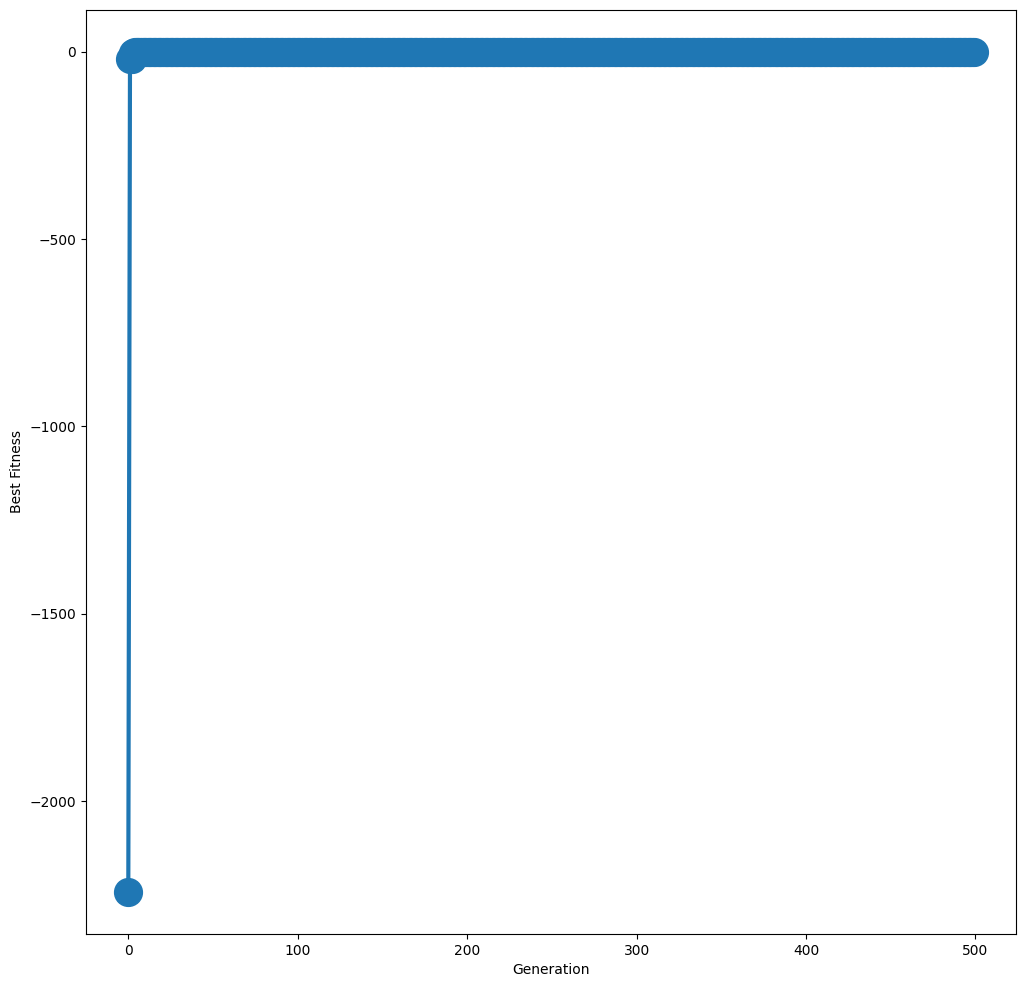

Best Fitnesses from All Generations
[-2.24239060e+03 -1.97536831e+01 -1.97536831e+01 -3.31537087e+00
 -6.03179036e-01 -3.55049239e-01 -5.87836479e-03 -3.67108541e-03
 -1.79290452e-04 -9.77587884e-05 -6.96742078e-06 -7.64277471e-07
 -3.79491852e-08 -9.06291564e-09 -3.88891786e-09 -2.28842633e-11
 -2.28842633e-11 -1.16594642e-11 -6.17457348e-15 -6.17457348e-15
 -2.11998222e-15 -9.87389853e-18 -9.87389853e-18 -9.87389853e-18
 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18
 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18
 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18
 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18 -5.70501763e-18
 -5.69606540e-18 -5.69606540e-18 -5.69606540e-18 -5.69606540e-18
 -5.69606540e-18 -5.69606540e-18 -5.69606540e-18 -5.69606540e-18
 -5.69606540e-18 -5.69606540e-18 -5.55933308e-18 -5.55933308e-18
 -5.55933308e-18 -5.55933308e-18 -5.55933308e-18 -5.55933308e-18
 -5.55933308e-18 -5.55933308e-18 -5.55933308e-18 -5.55

In [45]:
# Constants for GA
pop_size = 50

pop_spread = 1000

mates_quant = 25

children_quant = mates_quant - 1

num_generations = 500

prob_mutation = 0.05

mutation_spread = 0.05

pop_set,pop_fitness,best_solution,best_fitness,best_fitnesses = parabola_ga(pop_size, pop_spread, mates_quant, num_generations, children_quant, mutation_spread, prob_mutation)

In [42]:
def create_pop(pop_size, pop_spread):
    # Generates initial population of x values
    pop_set = np.zeros((pop_size, 1), dtype=float)
    # makes an empty column vector that has number of rows = pop_size
    for individual in range(pop_size):
        # indexes each row/individual in pop_set
        pop_set[individual, 0] = rand.uniform(-1*pop_spread, pop_spread)
        # chooses each individual's x value from between -spread and +spread
        
    return pop_set


def fitness_calc(pop_set):
    fitness = np.ndarray(shape=(len(pop_set[:, 0]),), dtype=float)

    for individual in range(len(pop_set[:, 0])):
        fitness[individual] = -1*objective_function(pop_set[individual, 0])

    return fitness

def mating(pop_set, fitness, mates_quant):
    mate_order = np.argsort(fitness)[::-1]
    # pop_size x 1 column vector of individual indices (row # in pop_set) in order of descending fitness
    # [::-1] means descending order
    parents = pop_set[mate_order]
    # creates descending fitness-ordered array of parents from whole rows of pop_set
    parents = parents[:mates_quant]
    print("trim parents", parents)
    # trims the number of rows up to but excluding the "mates_quant"'th indexed row
    parent_fitness = fitness[mate_order]
    # grabs the fitness of parents in descending order
    parent_fitness = parent_fitness[:mates_quant]
    # up to the number of parents selected
    # parents and their fitness are related index-wise

    return parents, parent_fitness


def crossover(parents, children_quant):
    children = np.zeros((children_quant, 1), dtype=float)
    # creates column vector with # rows = children_quant
    
    for child in range(children_quant):
        # indexes children up to given # of children
        crossing_ratio = np.random.uniform(0.0, 1.0)
        # generates random value between 0 and 1 to use as a weight for weighted average crossover
        p1_idx = child % children_quant
        # creates index/chooses row of parent for parent 1 of current loop child
        p2_idx = (child + 1) % children_quant
        # does the same for parent 2, restarts at parents[row index 0] when last child made
        children[child] = np.average((parents[p1_idx, 0], parents[p2_idx, 0]), weights=(1 - crossing_ratio, crossing_ratio))
        # performs crossover as weighted average of parent 1 and parent 2
        # crossover behavior: (parent 1 * crossing_ratio' + parent 2 * crossing_ratio)/2
        children_fitness = fitness_calc(children)
        # returns a column vector with child_quant # of rows filled with objective values of children
    return children, children_fitness
    # children and their fitness are related index-wise


def mutation(children, prob_mutation, mutation_spread):
    for child in range(len(children[:, 0])):
        # indexes rows in children
        mutated_children = children
        # renames copy of children to mutated_children containing the same values as children
        mutations = np.random.uniform(0.0, 1.0, (len(children[:, 0]), 1))
        # creates a column vector of random values between 0 and 1
        mutation_spread = np.random.uniform(-1*mutation_spread, mutation_spread)
            # create random percentage value between +-maximum percentage to increase/decrease mutated child by
        if mutations[child, 0] <= prob_mutation:
            # if mutation value[child row index] is less than specified prob
            mutated_children[child, 0] *= 1 + mutation_spread
            # increase/decrease child by the random percentage from above
    mutated_child_fitness = fitness_calc(children)
    # sets the fitness value of mutated offspring = the fitness of the given offspring pop

    return mutated_children, mutated_child_fitness


def environmental_selection(parents, mutated_children, pop_size, parent_fitness, mutated_children_fitness):
    pop_set = np.vstack((parents, mutated_children))
    # creates a population by stacking parents and mutated offspring row-wise (row on top of row)
    # ex: vstack(([1,2,3],[4,5,6])) = [[1,2,3],[4,5,6]]
    fitness = np.concatenate((parent_fitness, mutated_children_fitness))
    # creates long fitness column vector composed of parent then mutated offspring fitness
    # np.concatenate() uses existing axis if none specified, in this case, row
    # therefore fitness is also stacked row-wise
    fitness_order = np.argsort(fitness)[::-1]
    # (rows in parents + mutated children) x 1 column vector
    # filled with the individual indices (row # in pop_set) in order of descending fitness
    pop_set = pop_set[fitness_order]
    # reorders pop_set in descending fitness
    pop_set = pop_set[:pop_size, :]
    # trims the pop_set # of rows/population size to the specified pop_size
    pop_fitness = fitness[fitness_order][:pop_size]
    # grabs the objective value of individuals are carrying in descending order up to the size of pop
    # individuals and their fitness are related index-wise

    return pop_set, pop_fitness

a = create_pop(5, 1000)
print(a)
fitness_a = fitness_calc(a)
print(fitness_a)
parents_a, parent_a_fitness  = mating(a, fitness_a, 3)
print("parent", parents_a, "fitness", parent_a_fitness)
print(np.shape(parent_a_fitness))
children_a, children_fitness_a = crossover(parents_a,2)
print("children", children_a, "fitness", children_fitness_a)
mutated_children_a, mutated_children_fitness_a = mutation(children_a, 1, 0.1)
print("mut children", mutated_children_a, "mut fitness", mutated_children_fitness_a)
pop_set_a, pop_fitness_a = environmental_selection(parents_a, mutated_children_a, 3, parent_a_fitness, mutated_children_fitness_a)
print(pop_set_a, pop_fitness_a)

[[-999.32289408]
 [ 302.68818376]
 [ 257.17649535]
 [ 591.4646544 ]
 [-892.34033885]]
[-9986462.4664145   -916201.36586308  -661397.49761583 -3498304.37401731
 -7962712.80334947]
trim parents [[257.17649535]
 [302.68818376]
 [591.4646544 ]]
parent [[257.17649535]
 [302.68818376]
 [591.4646544 ]] fitness [ -661397.49761583  -916201.36586308 -3498304.37401731]
(3,)
children [[275.88854477]
 [279.95432233]] fitness [-761144.89135154 -783744.22589539]
mut children [[283.06320906]
 [282.26562883]] mut fitness [-801247.80323618 -796738.85219876]
[[257.17649535]
 [282.26562883]
 [283.06320906]] [-661397.49761583 -796738.85219876 -801247.80323618]
